In [3]:
import os
import glob
import sys
import subprocess
import xarray as xr
import numpy as np
from time import perf_counter

THIS_DIR = os.path.abspath('')
sys.path.append(os.path.join(THIS_DIR, os.pardir, os.pardir, os.pardir, os.pardir))


from src.postprocessing.py.qnc_defintions import Output_format
from src.postprocessing.py.qnc_output_parser import QNC_output_parser
from src.postprocessing.py.qnc_ncdf_reader import QNC_ncdf_reader


In [5]:
OUTPUT_DIR = "/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/jsbach_spq/17_transient_slurm_array/output/1400"

In [7]:
parser = QNC_output_parser(OUTPUT_DIR)
parser.Read()
output = parser.Available_outputs['fluxnetdata']

In [8]:
nc_output = QNC_ncdf_reader(OUTPUT_DIR,
                                        output.Categories,
                                        output.Identifier,
                                        output.Time_resolution
                                        )

nc_output.Parse_env_and_variables()
nc_output.Read_all_1D()
nc_output.Close()

In [12]:
nc_output.Datasets_1D['PHYD']

,index,date,time,psi_leaf_avg,frac_cav_xylem,psi_stem_avg,stem_flow_avg,res_flow_avg,G_avg
0,0,2000-01-01 00:00:00,0.0,-0.191243,6.620871e-09,-0.129381,1.809077e-08,2.402354e-07,1.342223e-06
1,1,2000-01-01 00:30:00,1800.0,-0.191243,6.620871e-09,-0.129381,1.809077e-08,1.463558e-07,1.342223e-06
2,2,2000-01-01 01:00:00,3600.0,-0.191243,6.620871e-09,-0.129381,1.809077e-08,8.610301e-08,1.342223e-06
3,3,2000-01-01 01:30:00,5400.0,-0.191243,6.620871e-09,-0.129381,1.809077e-08,9.798227e-08,1.342223e-06
4,4,2000-01-01 02:00:00,7200.0,-0.191243,6.620871e-09,-0.129381,1.809077e-08,1.000258e-07,1.342223e-06
...,...,...,...,...,...,...,...,...,...
437995,437995,2024-12-31 21:30:00,788391000.0,-0.183855,6.189322e-09,-0.020129,1.705532e-10,9.280306e-08,1.980011e-08
437996,437996,2024-12-31 22:00:00,788392800.0,-0.183855,6.189322e-09,-0.020129,1.705532e-10,1.144383e-07,1.980011e-08
437997,437997,2024-12-31 22:30:00,788394600.0,-0.183855,6.189322e-09,-0.020129,1.705532e-10,1.067086e-07,1.980011e-08
437998,437998,2024-12-31 23:00:00,788396400.0,-0.183855,6.189322e-09,-0.020129,1.705532e-10,1.438026e-07,1.980011e-08


In [15]:
rtobspath = "/Net/Groups/BSI/work_scratch/ppapastefanou/data/Fluxnet_detail/eval_processed"

In [53]:
import matplotlib.pyplot as plt
import datetime

(12996.0, 13027.0)

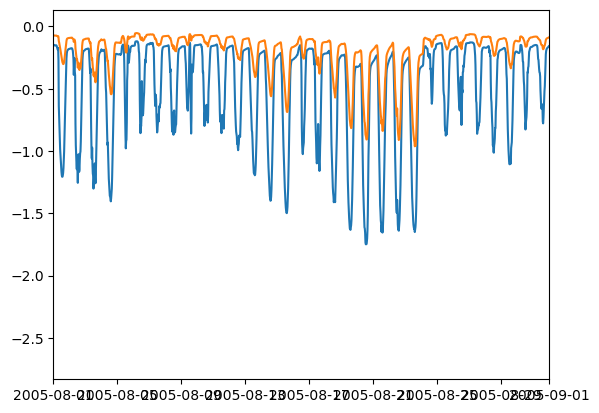

In [63]:
plt.plot(nc_output.Datasets_1D['PHYD']['date'], nc_output.Datasets_1D['PHYD']['psi_leaf_avg'] )
plt.plot(nc_output.Datasets_1D['PHYD']['date'], nc_output.Datasets_1D['PHYD']['psi_stem_avg'] )
plt.xlim((datetime.datetime(2005,8,1),datetime.datetime(2005,9,1)))

(12996.0, 13027.0)

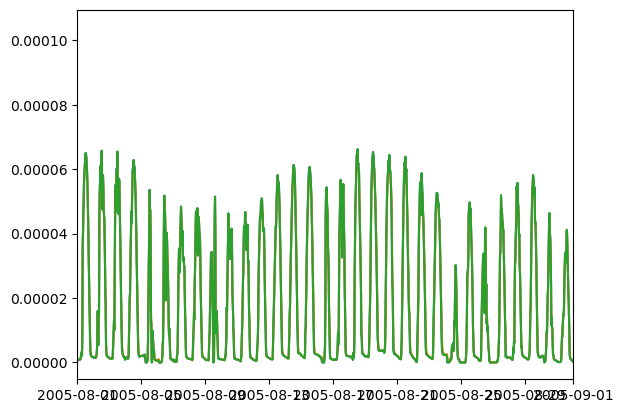

In [64]:
plt.plot(nc_output.Datasets_1D['PHYD']['date'], nc_output.Datasets_1D['PHYD']['stem_flow_avg'] )
plt.plot(nc_output.Datasets_1D['PHYD']['date'], nc_output.Datasets_1D['PHYD']['G_avg'] )
plt.plot(nc_output.Datasets_1D['PHYD']['date'], nc_output.Datasets_1D['SPQ']['transpiration_avg'])
# plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['psi_stem_avg'] )
plt.xlim((datetime.datetime(2005,8,1),datetime.datetime(2005,9,1)))

In [ ]:
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['stem_flow_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['G_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['SPQ']['transpiration_avg'] * 1000/18.0 )
plt.xlim((datetime.datetime(2005,5,5),datetime.datetime(2005,9,1)))

AttributeError: 'QNC_ncdf_reader' object has no attribute 'times_np_64'

(12913.0, 12935.0)

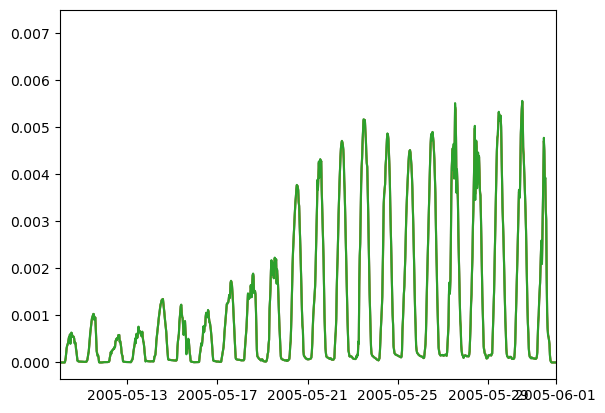

In [ ]:
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['stem_flow_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['G_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['SPQ']['transpiration_avg'] * 1000/18.0 )
plt.xlim((datetime.datetime(2005,5,10),datetime.datetime(2005,6,1)))

(12913.0, 12935.0)

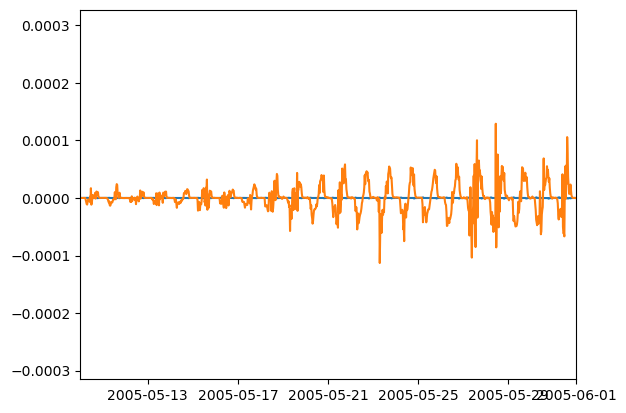

In [ ]:
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['stem_flow_avg']- nc_output.Datasets_1D['PHYD']['G_avg'] )
plt.plot(nc_output.times_np_64, nc_output.Datasets_1D['PHYD']['stem_flow_avg']- nc_output.Datasets_1D['SPQ']['transpiration_avg'] * 1000/18.0 )
plt.xlim((datetime.datetime(2005,5,10),datetime.datetime(2005,6,1)))